# Visualize pathway ranking

This notebook will visualize pathway ranking obtained by the different enrichment analysis methods.

**Note**: This notebook is expecting outputs for all enrichment methods generated by the [previous notebook](2_apply_enrichment_method.ipynb)

**Implementation note:**
The project id = GSE11352 for the human cancer analysis did not find any DEGs in the simulated experiments, so we are manually removing the ORA enrichment method for this array analysis. But this method can be added back by removing the conditional statements.

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

import os
import pandas as pd
import numpy as np
import plotnine as pn
from IPython.display import Image, display, SVG
import svgutils.transform as sg
from lxml import etree
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ponyo import utils

np.random.seed(123)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)

# Select platform technology

# platform = ["array", "rnaseq"]
platform = "rnaseq"

In [3]:
# Load params
dataset_name = params["dataset_name"]
project_id = params["project_id"]

In [4]:
# Create dictionary of enrichment method: statistic
method_stats_dict = {"GSEA": "padj", "GSVA": "ES", "CAMERA": "FDR", "ORA": "p.adjust"}

## Get pathway summary data

In [5]:
# Pathway summary files
gsea_pathway_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_pathway_summary_{project_id}.tsv"
)
gsva_pathway_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_pathway_summary_{project_id}_GSVA.tsv"
)
camera_pathway_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_pathway_summary_{project_id}_CAMERA.tsv"
)
ora_pathway_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_pathway_summary_{project_id}_ORA.tsv"
)

In [6]:
# Pathway summary data
gsea_pathway_summary = pd.read_csv(
    gsea_pathway_summary_filename, sep="\t", index_col=0, header=0
)
gsva_pathway_summary = pd.read_csv(
    gsva_pathway_summary_filename, sep="\t", index_col=0, header=0
)
camera_pathway_summary = pd.read_csv(
    camera_pathway_summary_filename, sep="\t", index_col=0, header=0
)

if platform == "rnaseq":
    ora_pathway_summary = pd.read_csv(
        ora_pathway_summary_filename, sep="\t", index_col=0, header=0
    )

## Format data for plotting

In [7]:
print(gsea_pathway_summary.shape)
gsea_pathway_summary.head()

(50, 11)


,Pathway ID,Adj P-value (Real),Rank (Real),padj (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Mean padj (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_GLYCOLYSIS,HALLMARK_GLYCOLYSIS,0.002045,49.0,0.002045,0.890575,17.0,26.666667,0.604897,0.446743,22,-1.349439
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,0.002045,49.0,0.002045,1.000000,5.0,0.000000,0.670416,0.434181,19,-1.539382
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,0.002045,49.0,0.002045,0.890625,16.0,24.444444,0.615432,0.445627,16,-1.376458
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,0.002818,44.0,0.002818,0.323868,36.0,68.888889,0.435743,0.437211,25,-0.990195
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,0.002818,44.0,0.002818,0.010659,48.0,95.555556,0.195781,0.366400,25,-0.526645


In [8]:
print(gsva_pathway_summary.shape)
gsva_pathway_summary.head()

(50, 11)


,Pathway ID,Rank (Real),abs(ES) (Real),ES (Real),Median ES (simulated),Rank (simulated),Percentile (simulated),Mean abs(ES) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,50.0,0.209187,-0.209187,0.163631,50.0,100.000000,0.172823,0.102192,25,0.355839
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,49.0,0.132144,0.132144,0.069741,34.0,67.346939,0.080977,0.056531,25,0.905115
HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,48.0,0.128857,-0.128857,0.075522,38.0,75.510204,0.075773,0.037622,25,1.410993
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,47.0,0.128787,-0.128787,0.053042,21.0,40.816327,0.069969,0.066880,25,0.879466
HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,46.0,0.124543,-0.124543,0.147243,49.0,97.959184,0.159338,0.102631,25,-0.339032


In [9]:
print(camera_pathway_summary.shape)
camera_pathway_summary.head()

(50, 11)


,Pathway ID,Adj P-value (Real),Rank (Real),FDR (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Mean FDR (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,2.580185e-07,50.0,2.580185e-07,3.739628e-08,50.0,100.000000,0.000040,0.000154,25,-0.254679
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,2.629681e-05,49.0,2.629681e-05,1.847834e-07,49.0,97.959184,0.000100,0.000418,25,-0.175510
HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANDROGEN_RESPONSE,1.082655e-04,48.0,1.082655e-04,4.272574e-06,48.0,95.918367,0.000176,0.000467,25,-0.144952
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,1.543327e-04,47.0,1.543327e-04,7.220993e-06,47.0,93.877551,0.000379,0.000946,25,-0.237279
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,4.179875e-04,46.0,4.179875e-04,1.107009e-05,46.0,91.836735,0.000931,0.002421,25,-0.211686


In [10]:
if platform == "rnaseq":
    print(ora_pathway_summary.shape)
    ora_pathway_summary.head()

(50, 11)


## Pathway ranking per enrichment method

In [11]:
# define plotting function
def plot_significance_vs_ranking(
    summary_df, method_name, stats_colname, x_label, data_type, output_figure_filename
):
    # Format input dataframe

    if stats_colname == "ES":
        plot_df = pd.DataFrame(
            data={
                "Test statistic": summary_df[
                    f"Median {stats_colname} (simulated)"
                ].values,
                "Percentile rank": summary_df["Percentile (simulated)"].values,
            },
            index=summary_df.index,
        )
    else:
        plot_df = pd.DataFrame(
            data={
                "Test statistic": -np.log10(
                    summary_df[f"Median {stats_colname} (simulated)"].values
                ),
                "Percentile rank": summary_df["Percentile (simulated)"].values,
            },
            index=summary_df.index,
        )

    fig = pn.ggplot(plot_df, pn.aes(x="Test statistic", y="Percentile rank"))
    fig += pn.geom_point()
    fig += pn.geom_point(
        plot_df[plot_df["Percentile rank"] > 90.0],
        pn.aes(x="Test statistic", y="Percentile rank"),
        color="red",
    )

    # Only used for array data
    # Manually stagger labels since they overlap here
    if data_type == "array":
        if method_name == "GSEA":
            labels = [
                x if plot_df.loc[x, "Percentile rank"] > 90.0 else ""
                for x in plot_df.index
            ]
            labels_1 = [x if x == "HALLMARK_MYC_TARGETS_V1" else "" for x in labels]
            labels_2 = [x if x == "HALLMARK_E2F_TARGETS" else "" for x in labels]
            labels_3 = [x if x == "HALLMARK_G2M_CHECKPOINT" else "" for x in labels]
            labels_4 = [
                x if x == "HALLMARK_INTERFERON_GAMMA_RESPONSE" else "" for x in labels
            ]
            labels_5 = [
                x if x == "HALLMARK_INFLAMMATORY_RESPONSE" else "" for x in labels
            ]
            labels_6 = [
                x if x == "HALLMARK_TNFA_SIGNALING_VIA_NFKB" else "" for x in labels
            ]

            fig += pn.geom_text(
                pn.aes(label=labels_1), ha="right", va="top", size=5, y=102
            )
            fig += pn.geom_text(
                pn.aes(label=labels_2), ha="right", va="bottom", size=5, y=98
            )
            fig += pn.geom_text(
                pn.aes(label=labels_3), ha="right", va="bottom", size=5, y=96
            )
            fig += pn.geom_text(
                pn.aes(label=labels_4), ha="right", va="bottom", size=5, y=94
            )
            fig += pn.geom_text(
                pn.aes(label=labels_5), ha="right", va="bottom", size=5, y=92
            )
            fig += pn.geom_text(
                pn.aes(label=labels_6), ha="right", va="bottom", size=5, y=90
            )
        else:
            fig += pn.geom_text(
                pn.aes(
                    label=[
                        x if plot_df.loc[x, "Percentile rank"] > 90.0 else ""
                        for x in plot_df.index
                    ]
                ),
                ha="right",
                va="top",
                size=5,
            )

    # If using RNA-seq
    if data_type == "rnaseq":
        fig += pn.geom_text(
            pn.aes(
                label=[
                    x if plot_df.loc[x, "Percentile rank"] > 90.0 else ""
                    for x in plot_df.index
                ]
            ),
            ha="right",
            va="top",
            size=5,
        )
        fig += pn.labs(
            x=x_label,
            y="Commonly enriched (percentile of ranking)",
            title=f"{method_name} pathway statistics $v.s.$ ranking",
        )
        fig += pn.theme_bw()
        fig += pn.theme(
            legend_title_align="center",
            plot_background=pn.element_rect(fill="white"),
            legend_key=pn.element_rect(fill="white", colour="white"),
            legend_title=pn.element_text(family="sans-serif", size=15),
            legend_text=pn.element_text(family="sans-serif", size=12),
            plot_title=pn.element_text(family="sans-serif", size=15),
            axis_text=pn.element_text(family="sans-serif", size=12),
            axis_title=pn.element_text(family="sans-serif", size=15),
        )

    # Save figure
    fig.save(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )
    print(fig)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSEA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


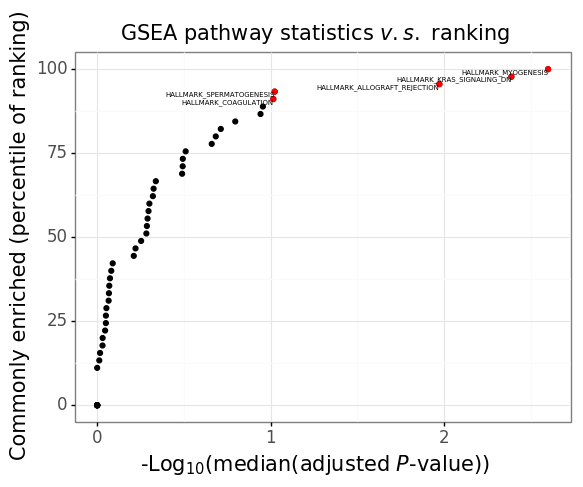

<ggplot: (-9223363266750389644)>


In [12]:
plot_significance_vs_ranking(
    gsea_pathway_summary,
    "GSEA",
    "adj p-value",
    r"-Log$_{10}$(median(adjusted $P$-value))",
    "rnaseq",
    "GSEA_pathway_ranking.svg",
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSVA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


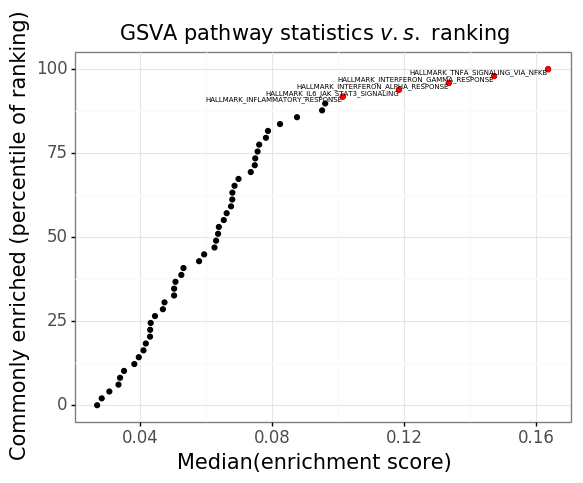

<ggplot: (8770087931996)>


In [13]:
plot_significance_vs_ranking(
    gsva_pathway_summary,
    "GSVA",
    "ES",
    "Median(enrichment score)",
    "rnaseq",
    "GSVA_pathway_ranking.svg",
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: CAMERA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


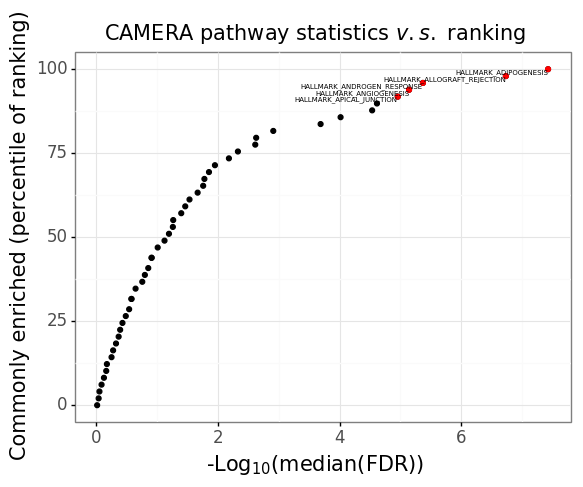

<ggplot: (-9223363266750411716)>


In [14]:
plot_significance_vs_ranking(
    camera_pathway_summary,
    "CAMERA",
    "adj p-value",
    r"-Log$_{10}$(median(FDR))",
    "rnaseq",
    "CAMERA_pathway_ranking.svg",
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ORA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


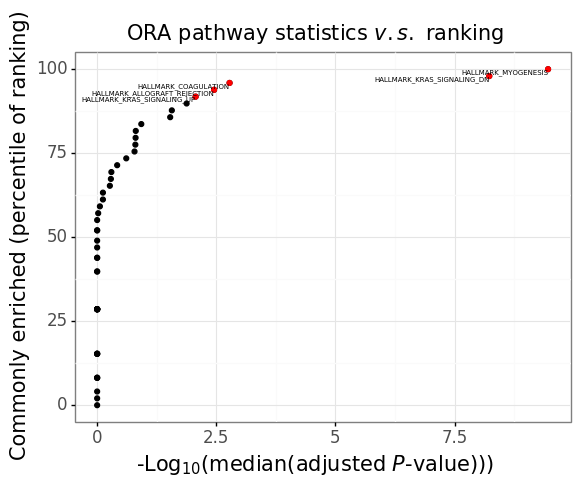

<ggplot: (-9223363266767047466)>


In [15]:
if platform == "rnaseq":
    plot_significance_vs_ranking(
        ora_pathway_summary,
        "ORA",
        "adj p-value",
        r"-Log$_{10}$(median(adjusted $P$-value)))",
        "rnaseq",
        "ORA_pathway_ranking.svg",
    )

## Compare pathway ranking across enrichment methods

In [16]:
# define plotting function
def plot_paired_ranking(
    method1_summary_df,
    method2_summary_df,
    method1_name,
    method2_name,
    output_figure_filename,
):
    # Join dataframes to make sure the rows are aligned
    merged_summary_df = method1_summary_df.merge(
        method2_summary_df,
        left_index=True,
        right_index=True,
        suffixes=[f"_{method1_name}", f"_{method2_name}"],
    )

    # Format input dataframe
    plot_df = pd.DataFrame(
        data={
            "Method1 ranking": merged_summary_df[
                f"Percentile (simulated)_{method1_name}"
            ].values,
            "Method2 ranking": merged_summary_df[
                f"Percentile (simulated)_{method2_name}"
            ].values,
        },
        index=merged_summary_df.index,
    )
    fig = pn.ggplot(plot_df, pn.aes(x="Method1 ranking", y="Method2 ranking"))
    fig += pn.geom_point()
    fig += pn.labs(
        x=f"{method1_name} pathway ranking",
        y=f"{method2_name} pathway ranking",
        title=f"{method1_name} $v.s.$ {method2_name} pathway ranking",
    )
    fig += pn.theme_bw()
    fig += pn.theme(
        legend_title_align="center",
        plot_background=pn.element_rect(fill="white"),
        legend_key=pn.element_rect(fill="white", colour="white"),
        legend_title=pn.element_text(family="sans-serif", size=15),
        legend_text=pn.element_text(family="sans-serif", size=12),
        plot_title=pn.element_text(family="sans-serif", size=15),
        axis_text=pn.element_text(family="sans-serif", size=12),
        axis_title=pn.element_text(family="sans-serif", size=15),
    )

    # Save figure
    fig.save(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )
    print(fig)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsea_gsva_compare_ranking.svg
  warn('Filename: {}'.format(filename))


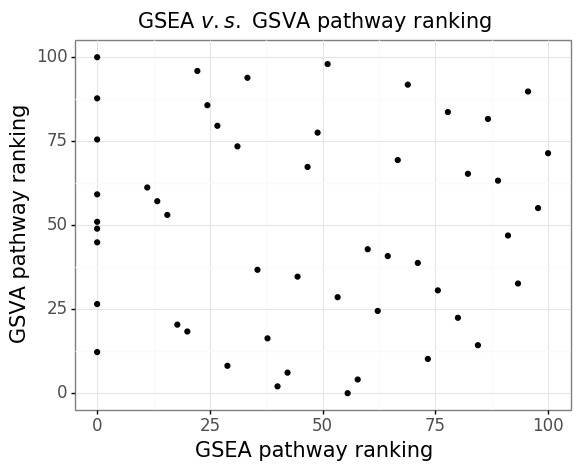

<ggplot: (8770087559074)>


In [17]:
plot_paired_ranking(
    gsea_pathway_summary,
    gsva_pathway_summary,
    "GSEA",
    "GSVA",
    "gsea_gsva_compare_ranking.svg",
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsea_camera_compare_ranking.svg
  warn('Filename: {}'.format(filename))


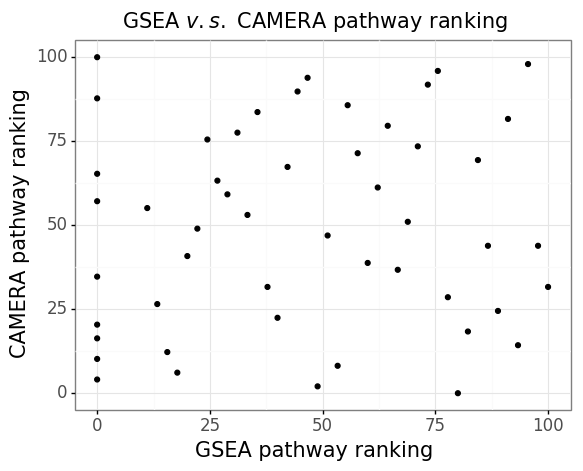

<ggplot: (8770087540081)>


In [18]:
plot_paired_ranking(
    gsea_pathway_summary,
    camera_pathway_summary,
    "GSEA",
    "CAMERA",
    "gsea_camera_compare_ranking.svg",
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsea_ora_compare_ranking.svg
  warn('Filename: {}'.format(filename))


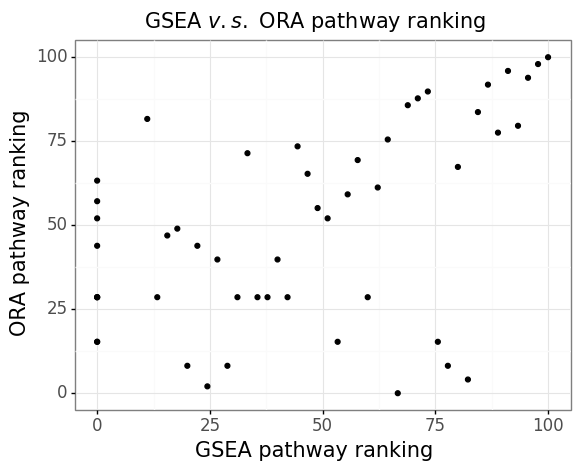

<ggplot: (8770087533397)>


In [19]:
if platform == "rnaseq":
    plot_paired_ranking(
        gsea_pathway_summary,
        ora_pathway_summary,
        "GSEA",
        "ORA",
        "gsea_ora_compare_ranking.svg",
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsva_camera_compare_ranking.svg
  warn('Filename: {}'.format(filename))


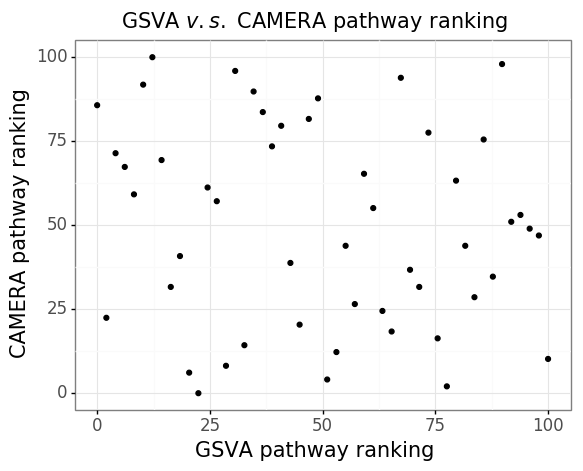

<ggplot: (-9223363266767242261)>


In [20]:
plot_paired_ranking(
    gsva_pathway_summary,
    camera_pathway_summary,
    "GSVA",
    "CAMERA",
    "gsva_camera_compare_ranking.svg",
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsva_ora_compare_ranking.svg
  warn('Filename: {}'.format(filename))


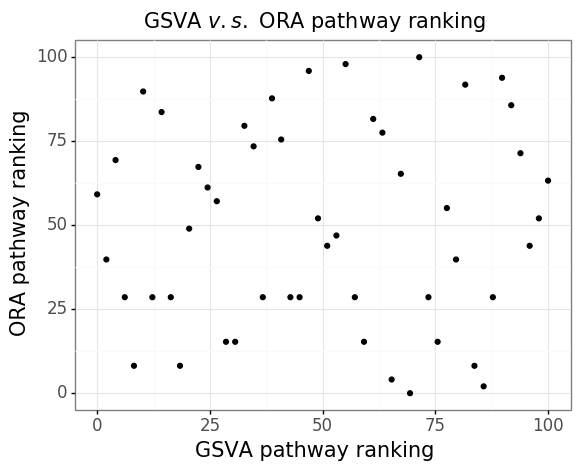

<ggplot: (8770087704040)>


In [21]:
if platform == "rnaseq":
    plot_paired_ranking(
        gsva_pathway_summary,
        ora_pathway_summary,
        "GSVA",
        "ORA",
        "gsva_ora_compare_ranking.svg",
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: camera_ora_compare_ranking.svg
  warn('Filename: {}'.format(filename))


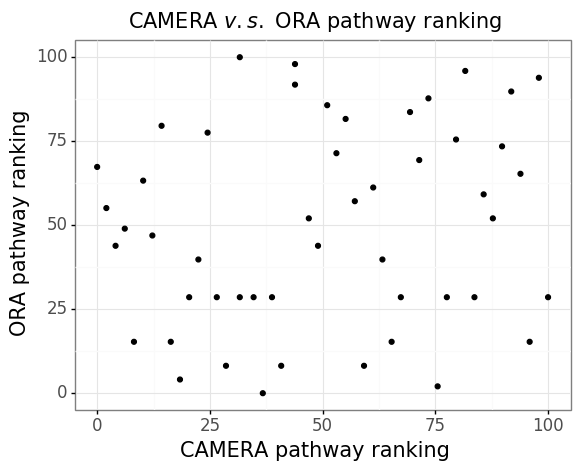

<ggplot: (8770087749170)>


In [22]:
if platform == "rnaseq":
    plot_paired_ranking(
        camera_pathway_summary,
        ora_pathway_summary,
        "CAMERA",
        "ORA",
        "camera_ora_compare_ranking.svg",
    )

## Assemble plots into figure


In [23]:
def make_figure_panel(filename, scale_x_input, scale_y_input, x_loc, y_loc):
    panel = sg.fromfile(filename)

    panel_size = (
        np.round(float(panel.root.attrib["width"][:-2]) * 1.33, 0),
        np.round(float(panel.root.attrib["height"][:-2]) * 1.33, 0),
    )

    scale_x = scale_x_input
    scale_y = scale_y_input

    print(f"original: {panel_size}")
    print(f"scaled:{(panel_size[0]*scale_x,panel_size[1]*scale_y)}")

    panel = panel.getroot()
    panel.scale_xy(x=scale_x, y=scale_y)
    panel.moveto(x_loc, y_loc)

    return panel

In [24]:
# Create diagonal panels
panel_11 = make_figure_panel(
    "GSEA_pathway_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=10,
    y_loc=10,
)
panel_22 = make_figure_panel(
    "GSVA_pathway_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=210,
    y_loc=200,
)
panel_33 = make_figure_panel(
    "CAMERA_pathway_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=410,
    y_loc=400,
)
if platform == "rnaseq":
    panel_44 = make_figure_panel(
        "ORA_pathway_ranking.svg",
        scale_x_input=0.45,
        scale_y_input=0.45,
        x_loc=610,
        y_loc=600,
    )

original: (541.0, 442.0)
scaled:(243.45000000000002, 198.9)
original: (541.0, 442.0)
scaled:(243.45000000000002, 198.9)
original: (541.0, 442.0)
scaled:(243.45000000000002, 198.9)
original: (541.0, 442.0)
scaled:(243.45000000000002, 198.9)


In [25]:
# Create off-diagonal panels
panel_21 = make_figure_panel(
    "gsea_gsva_compare_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=10,
    y_loc=200,
)
panel_31 = make_figure_panel(
    "gsea_camera_compare_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=10,
    y_loc=400,
)
if platform == "rnaseq":
    panel_41 = make_figure_panel(
        "gsea_ora_compare_ranking.svg",
        scale_x_input=0.45,
        scale_y_input=0.45,
        x_loc=10,
        y_loc=600,
    )
panel_23 = make_figure_panel(
    "gsva_camera_compare_ranking.svg",
    scale_x_input=0.45,
    scale_y_input=0.45,
    x_loc=210,
    y_loc=400,
)

if platform == "rnaseq":
    panel_24 = make_figure_panel(
        "gsva_ora_compare_ranking.svg",
        scale_x_input=0.45,
        scale_y_input=0.45,
        x_loc=210,
        y_loc=600,
    )
    panel_34 = make_figure_panel(
        "camera_ora_compare_ranking.svg",
        scale_x_input=0.45,
        scale_y_input=0.45,
        x_loc=410,
        y_loc=600,
    )

original: (541.0, 429.0)
scaled:(243.45000000000002, 193.05)
original: (541.0, 429.0)
scaled:(243.45000000000002, 193.05)
original: (541.0, 429.0)
scaled:(243.45000000000002, 193.05)
original: (541.0, 429.0)
scaled:(243.45000000000002, 193.05)
original: (541.0, 429.0)
scaled:(243.45000000000002, 193.05)
original: (541.0, 429.0)
scaled:(243.45000000000002, 193.05)


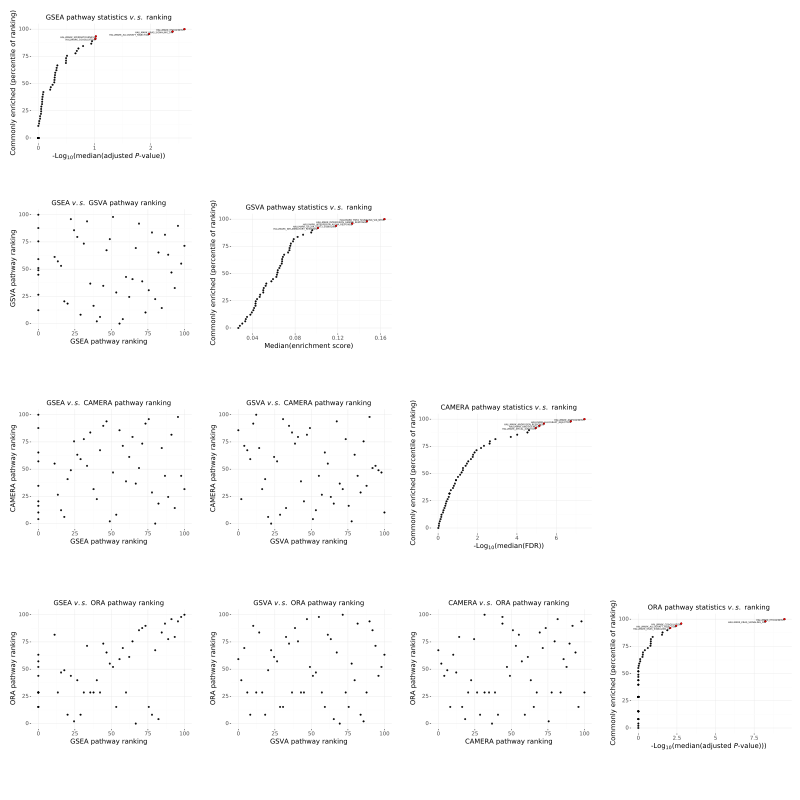

In [26]:
if platform == "rnaseq":
    figure_1 = sg.SVGFigure("800", "800")
    figure_1.append(
        [
            etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
            panel_11,
            panel_22,
            panel_33,
            panel_44,
            panel_21,
            panel_31,
            panel_41,
            panel_23,
            panel_24,
            panel_34,
        ]
    )
    display(SVG(figure_1.to_str()))
else:
    figure_1 = sg.SVGFigure("600", "600")
    figure_1.append(
        [
            etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
            panel_11,
            panel_22,
            panel_33,
            panel_21,
            panel_31,
            panel_23,
        ]
    )
    display(SVG(figure_1.to_str()))

## Create heatmap

To compare the different methods as a simplified version of the scatter plots

In [27]:
gsea_percentile = gsea_pathway_summary["Percentile (simulated)"]
gsva_percentile = gsva_pathway_summary["Percentile (simulated)"]
camera_percentile = camera_pathway_summary["Percentile (simulated)"]
ora_percentile = ora_pathway_summary["Percentile (simulated)"]

In [28]:
result = pd.concat(
    [gsea_percentile, gsva_percentile, camera_percentile, ora_percentile],
    axis=1,
    join="inner",
)
result.head()

,Percentile (simulated),Percentile (simulated),Percentile (simulated),Percentile (simulated)
pathway,,,,
HALLMARK_GLYCOLYSIS,26.666667,79.591837,63.265306,39.795918
HALLMARK_G2M_CHECKPOINT,0.000000,59.183673,65.306122,15.306122
HALLMARK_E2F_TARGETS,24.444444,85.714286,75.510204,2.040816
HALLMARK_INFLAMMATORY_RESPONSE,68.888889,91.836735,51.020408,85.714286
HALLMARK_ALLOGRAFT_REJECTION,95.555556,89.795918,97.959184,93.877551


In [29]:
pathway_method_corr = result.corr()
pathway_method_corr.columns = [
    "GSEA pathway ranking",
    "GSVA pathway ranking",
    "CAMERA pathway ranking",
    "ORA pathway ranking",
]
pathway_method_corr.index = [
    "GSEA pathway ranking",
    "GSVA pathway ranking",
    "CAMERA pathway ranking",
    "ORA pathway ranking",
]
pathway_method_corr

,GSEA pathway ranking,GSVA pathway ranking,CAMERA pathway ranking,ORA pathway ranking
GSEA pathway ranking,1.000000,-0.039827,0.093528,0.483657
GSVA pathway ranking,-0.039827,1.000000,-0.167739,0.044709
CAMERA pathway ranking,0.093528,-0.167739,1.000000,0.178845
ORA pathway ranking,0.483657,0.044709,0.178845,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

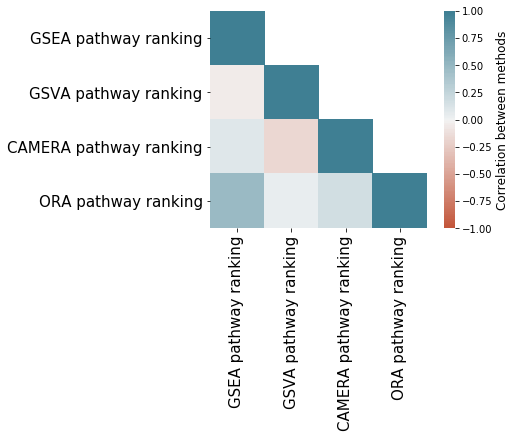

In [30]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pathway_method_corr, dtype=bool))

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

f = sns.heatmap(
    pathway_method_corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
f.figure.axes[-1].set_ylabel("Correlation between methods", size=12)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [31]:
## save generated SVG files
figure_1.save(f"enrichment_paired_plot_{platform}.svg")
f.figure.savefig("enrichment_corr_plot.svg")

**Takeaway:**
* Here are the results demonstrating that different enrichment methods can easily be plugged into our simulation workflow to identify generic gene sets
* Depending on the enrichment method, pathway rankings vary due to the different assumptions and modeling procedures - there is not much concordance between different enrichment methods except GSEA and GSVA using the Powers et. al. dataset. More details about the methods can be found in the [previous notebook](2_apply_enrichment_method.ipynb)
  * Given that the Powers et. al. dataset is more uniform and GSVA method is sample-wise, which can be more sensitive to noise this would be my guess as to why there is less consistency between the two in the RNA-seq dataset.
* The generic pathways found in figure 4 [Powers et. al.](https://www.biorxiv.org/content/10.1101/259440v1.full.pdf), were consistent with the top ranked pathways found using GSVA (for both recount2 and Powers et. al. trained models) and GSEA (only for Powers et. al. trained model).